#  Predicting Movie Genre Popularity from Popular Reviews:
In this project, we are going to use machine learning models to predict Letterboxd ratings of a movie genre particular.


# 1. Data Understanding

###Dataset
The Dataset used in this project is the *Letterboxd All Movie Data dataset*, which is available on Hugging Face.

With over 800,000 movies, this dataset provides huge and diverse data, improving the reliability of training machine learning models across different genres, time periods, and audience demographics.

The inclusion of both structured metadata (e.g., genres, release year) and unstructured text (reviews) allows us to capture both statistical patterns and audience sentiment, which is crucial for understanding long-term genre trends.



### Importing Needed packages

In [ ]:
from datasets import load_dataset
import pandas as pd
import ast
import re

### Load the dataset

In [ ]:
train_dataset = load_dataset("pkchwy/letterboxd-all-movie-data", split="train")

#Convert to a pandas Dataframe
df = pd.DataFrame(train_dataset)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

full_dump.jsonl:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Generating train split:   0%|          | 0/847209 [00:00<?, ? examples/s]

### Preview the Dataset

In [ ]:
#Displaying the First 5 Rows of the Dataset
df.head()

,url,title,year,directors,genres,cast,synopsis,rating,reviews,poster_url
0,https://letterboxd.com/film/come-and-see/,Come and See,1985,[Elem Klimov],"[War, Drama]","[Aleksei Kravchenko, Olga Mironova, Liubomiras...",The invasion of a village in Byelorussia by Ge...,4.62 out of 5,"[{'username': 'cameron fetter', 'review_text':...",https://a.ltrbxd.com/resized/film-poster/3/6/1...
1,https://letterboxd.com/film/seven-samurai/,Seven Samurai,1954,[Akira Kurosawa],"[Action, Drama]","[Toshirō Mifune, Takashi Shimura, Yoshio Inaba...",A samurai answers a village's request for prot...,4.61 out of 5,"[{'username': 'maria', 'review_text': 'too man...",https://a.ltrbxd.com/resized/film-poster/5/1/7...
2,https://letterboxd.com/film/high-and-low/,High and Low,1963,[Akira Kurosawa],"[Mystery, Thriller, Crime, Drama]","[Toshirō Mifune, Tatsuya Nakadai, Kyōko Kagawa...",In the midst of an attempt to take over his co...,4.60 out of 5,"[{'username': 'Karsten', 'review_text': 'every...",https://a.ltrbxd.com/resized/film-poster/4/4/5...
3,https://letterboxd.com/film/harakiri/,Harakiri,1962,[Masaki Kobayashi],"[History, Drama, Action]","[Tatsuya Nakadai, Akira Ishihama, Shima Iwashi...",Down-on-his-luck veteran Tsugumo Hanshirō ente...,4.69 out of 5,"[{'username': 'Ciara', 'review_text': 'Why is ...",https://a.ltrbxd.com/resized/film-poster/4/3/0...
4,https://letterboxd.com/film/12-angry-men/,12 Angry Men,1957,[Sidney Lumet],[Drama],"[Martin Balsam, John Fiedler, Lee J. Cobb, E.G...",The defense and the prosecution have rested an...,4.63 out of 5,"[{'username': 'amaya', 'review_text': '1. henr...",https://a.ltrbxd.com/resized/film-poster/5/1/7...


In [ ]:
# Get Information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847209 entries, 0 to 847208
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   url         847209 non-null  object
 1   title       847209 non-null  object
 2   year        770792 non-null  object
 3   directors   732443 non-null  object
 4   genres      638857 non-null  object
 5   cast        595214 non-null  object
 6   synopsis    727899 non-null  object
 7   rating      108834 non-null  object
 8   reviews     366600 non-null  object
 9   poster_url  847209 non-null  object
dtypes: object(10)
memory usage: 64.6+ MB


In [ ]:
# Check the Shape of the Dataset
df.shape

(847209, 10)

In [ ]:
# Check Data Types
df.dtypes

,0
url,object
title,object
year,object
directors,object
genres,object
cast,object
synopsis,object
rating,object
reviews,object
poster_url,object


# 2. Data Preparation

###Missing Values

In [ ]:
# Chech missing values
df.isnull().sum()

,0
url,0
title,0
year,76417
directors,114766
genres,208352
cast,251995
synopsis,119310
rating,738375
reviews,480609
poster_url,0


### Dropping columns

We will keep the columns needed for this task, which are reviews, genres, year, and rating.

In [ ]:
#Keeping only needed columns for the task
df = df[['rating', 'genres', 'year', 'reviews']]
df.head()

,rating,genres,year,reviews
0,4.62 out of 5,"[War, Drama]",1985,"[{'username': 'cameron fetter', 'review_text':..."
1,4.61 out of 5,"[Action, Drama]",1954,"[{'username': 'maria', 'review_text': 'too man..."
2,4.60 out of 5,"[Mystery, Thriller, Crime, Drama]",1963,"[{'username': 'Karsten', 'review_text': 'every..."
3,4.69 out of 5,"[History, Drama, Action]",1962,"[{'username': 'Ciara', 'review_text': 'Why is ..."
4,4.63 out of 5,[Drama],1957,"[{'username': 'amaya', 'review_text': '1. henr..."


In [ ]:
# Dropping rows with missing rows
df.dropna(subset=['reviews', 'genres', 'year','rating' ], inplace=True)

In [ ]:
df.isnull().sum()

,0
rating,0
genres,0
year,0
reviews,0


### Extracting the first Genre

For this task we will extract the first genre for each movie for a better and easier predection.

In [ ]:
df["genre"] = df["genres"].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

df = df.drop(columns=["genres"])
df["genre"].head()

,genre
0,War
1,Action
2,Mystery
3,History
4,Drama


### Converting the Year column

We will convert the Year column to a numerical data type.

In [ ]:
df['Year'] = df['year'].str.extract(r'(\d+)').astype(int)

### Converting the Rating Column

We will conver the Rating column text from ("4.61 out of 5") to float.

In [ ]:
df['rating'] = df['rating'].apply(lambda x: float(re.findall(r"[\d\.]+", x)[0]) if isinstance(x, str)else x)
df['rating'].head()

,rating
0,4.62
1,4.61
2,4.60
3,4.69
4,4.63


### Extract Review text

Each movie contain multiple reviews. We will make each review on its own row, while keeping the same genre, year, and rating for that movie.

In [ ]:
expanded_rows = []
for _, row in df.iterrows():
  if isinstance (row["reviews"], list):
    for review in row["reviews"]:
      expanded_rows.append({
          "review_text": review.get("review_text", ""),
          "genre": row ["genre"],
          "year": row ["year"],
          "rating": row ["rating"],
      })
#Conver expanded list into a new Dataframe
reviews_df = pd.DataFrame(expanded_rows).copy()


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-letters
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Apply cleaning
reviews_df["cleaned_review"] = reviews_df["review_text"].apply(clean_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


### Remove Small Genres

In [ ]:
#Counting reviews per genre, setting threshold
genre_counts = reviews_df["genre"].value_counts()
min_reviews = 5000

#keeping genres that meet the threshold
valid_genres = genre_counts[genre_counts >= min_reviews].index
reviews_df = reviews_df[reviews_df["genre"].isin(valid_genres)]

print("Adjusted Genres:", reviews_df["genre"].unique())
print("Number of Genres:", len(reviews_df["genre"].unique()))
print("Number of Reviews:", len(reviews_df))


Adjusted Genres: ['War' 'Action' 'Mystery' 'History' 'Drama' 'Music' 'Family' 'Documentary'
 'Animation' 'Thriller' 'Comedy' 'Western' 'TV Movie' 'Crime' 'Adventure'
 'Romance' 'Science Fiction' 'Fantasy' 'Horror']
Number of Genres: 19
Number of Reviews: 938038


### Compute Genre Avarage Rating

In [ ]:
#Calculating the average rating for each genre and year
avg_genre_year = reviews_df.groupby(["genre", "year"])["rating"].mean()

# Map the average genre rating back to the DataFrame
reviews_df['avg_genre_year_rating'] = reviews_df.apply(lambda row: avg_genre_year.get((row['genre'], row['year']), None), axis=1)

#target label column
y = reviews_df["avg_genre_year_rating"]


### Rating Categorization to 5 Classes


In [ ]:
import numpy as np

# Calculate percentile thresholds
p20 = np.percentile(reviews_df['avg_genre_year_rating'], 20)
p40 = np.percentile(reviews_df['avg_genre_year_rating'], 40)
p60 = np.percentile(reviews_df['avg_genre_year_rating'], 60)
p80 = np.percentile(reviews_df['avg_genre_year_rating'], 80)

print("="*70)
print("RATING CATEGORIZATION: 5 BALANCED CATEGORIES")
print("="*70)
print(f"\nThresholds (Percentile-based):")
print(f"  Very Low: < {p20:.2f}")
print(f"  Low: {p20:.2f} - {p40:.2f}")
print(f"  Mid: {p40:.2f} - {p60:.2f}")
print(f"  High: {p60:.2f} - {p80:.2f}")
print(f"  Very High: >= {p80:.2f}")

def categorize_rating(rating):
    """
    Categorize rating into 5 classes:
    0: Very Low (< 20th percentile)
    1: Low (20th - 40th percentile)
    2: Mid (40th - 60th percentile)
    3: High (60th - 80th percentile)
    4: Very High (>= 80th percentile)
    """
    if rating < p20:
        return 0
    elif rating < p40:
        return 1
    elif rating < p60:
        return 2
    elif rating < p80:
        return 3
    else:
        return 4

# Apply categorization
reviews_df['rating_category'] = reviews_df['avg_genre_year_rating'].apply(categorize_rating)

# Display distribution
print("\n" + "="*70)
print("CATEGORY DISTRIBUTION")
print("="*70)
category_names = ['Very Low', 'Low', 'Mid', 'High', 'Very High']

for cat_id in sorted(reviews_df['rating_category'].unique()):
    count = (reviews_df['rating_category'] == cat_id).sum()
    print(f"  {cat_id} ({category_names[cat_id]}): {count:,} samples ({count/len(reviews_df)*100:.2f}%)")

print(f"\nTotal samples: {len(reviews_df):,}")


RATING CATEGORIZATION: 5 BALANCED CATEGORIES

Thresholds (Percentile-based):
  Very Low: < 3.08
  Low: 3.08 - 3.24
  Mid: 3.24 - 3.33
  High: 3.33 - 3.47
  Very High: >= 3.47

CATEGORY DISTRIBUTION
  0 (Very Low): 182,907 samples (19.50%)
  1 (Low): 192,244 samples (20.49%)
  2 (Mid): 187,041 samples (19.94%)
  3 (High): 187,815 samples (20.02%)
  4 (Very High): 188,031 samples (20.05%)

Total samples: 938,038


### Droping Rating Column

In [ ]:
reviews_df.drop(columns=["rating"] , inplace= True)

### Filter out movies

In [ ]:
reviews_df['year'] = pd.to_numeric(reviews_df['year'], errors='coerce')
reviews_df = reviews_df[reviews_df['year'] >= 2000].copy()

print(f"Number of reviews after filtering by year: {len(reviews_df)}")
display(reviews_df.head())

Number of reviews after filtering by year: 613341


,review_text,genre,year,cleaned_review,avg_genre_year_rating,rating_category
50,"Nerve-shredding, well-paced and grimly told;Ch...",Drama,2019,nerveshredding wellpaced grimly toldchernobyli...,3.30573,2
51,watch me recommend this to everyone i know eve...,Drama,2019,watch recommend everyone know even every episo...,3.30573,2
52,"Begins as visceral, graphic recreation and end...",Drama,2019,begin visceral graphic recreation end systemat...,3.30573,2
53,If you watch something like this and your big ...,Drama,2019,watch something like big takeaway filmed engli...,3.30573,2
54,Everybody gangsta till the horror movie is bas...,Drama,2019,everybody gangsta till horror movie based true...,3.30573,2


### Sentiment Analysis

In [ ]:
!pip install vaderSentiment --quiet

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return 0.0
    return sia.polarity_scores(text)["compound"]

reviews_df["sentiment_score"] = reviews_df["review_text"].apply(get_vader_sentiment)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.1 MB/s eta 0:00:00


### Preview & Save the Cleaned Dataset

In [ ]:
reviews_df.head(15)

,review_text,genre,year,cleaned_review,avg_genre_year_rating,rating_category,sentiment_score
50,"Nerve-shredding, well-paced and grimly told;Ch...",Drama,2019,nerveshredding wellpaced grimly toldchernobyli...,3.305730,2,-0.5574
51,watch me recommend this to everyone i know eve...,Drama,2019,watch recommend everyone know even every episo...,3.305730,2,-0.0772
52,"Begins as visceral, graphic recreation and end...",Drama,2019,begin visceral graphic recreation end systemat...,3.305730,2,-0.5719
53,If you watch something like this and your big ...,Drama,2019,watch something like big takeaway filmed engli...,3.305730,2,0.4215
54,Everybody gangsta till the horror movie is bas...,Drama,2019,everybody gangsta till horror movie based true...,3.305730,2,-0.2263
55,"""Every lie we tell incurs a debt to the truth....",Drama,2019,every lie tell incurs debt truth sooner later ...,3.305730,2,-0.4019
56,the idiocy of the human race never ceases to a...,Drama,2019,idiocy human race never cease amaze,3.305730,2,-0.4310
57,the scientists when chernobyl is burning down ...,Drama,2019,scientist chernobyl burning microwaving everyo...,3.305730,2,0.2023
58,"""Nun bin ich der Tod geworden, der Zerstörer d...",Drama,2019,nun bin ich der tod geworden der zerstrer der ...,3.305730,2,0.0000
59,I got control rods in the backXenon is attache...,Drama,2019,got control rod backxenon attachedgraphite tip...,3.305730,2,0.0000


In [ ]:
reviews_df = pd.get_dummies(reviews_df, columns=['genre'], prefix='genre')
reviews_df.head()

,review_text,year,cleaned_review,avg_genre_year_rating,rating_category,sentiment_score,genre_Action,genre_Adventure,genre_Animation,genre_Comedy,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
50,"Nerve-shredding, well-paced and grimly told;Ch...",2019,nerveshredding wellpaced grimly toldchernobyli...,3.30573,2,-0.5574,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51,watch me recommend this to everyone i know eve...,2019,watch recommend everyone know even every episo...,3.30573,2,-0.0772,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52,"Begins as visceral, graphic recreation and end...",2019,begin visceral graphic recreation end systemat...,3.30573,2,-0.5719,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
53,If you watch something like this and your big ...,2019,watch something like big takeaway filmed engli...,3.30573,2,0.4215,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
54,Everybody gangsta till the horror movie is bas...,2019,everybody gangsta till horror movie based true...,3.30573,2,-0.2263,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(reviews_df[['review_text', 'sentiment_score']].head())

reviews_df.to_csv("lettedboxed_clean_dataset.csv", index=False, encoding="utf-8")

                                          review_text  sentiment_score
50  Nerve-shredding, well-paced and grimly told;Ch...          -0.5574
51  watch me recommend this to everyone i know eve...          -0.0772
52  Begins as visceral, graphic recreation and end...          -0.5719
53  If you watch something like this and your big ...           0.4215
54  Everybody gangsta till the horror movie is bas...          -0.2263


# 3. Text Vectorization(TF-IDF) with tuning

1.Use TF-IDF (Term Frequency–Inverse Document Frequency) to transform the cleaned_review column into numeric vectors.

2.Limit the number of features using max_features=5000 to maintain computational efficiency.

3.Store the vectorized output as X_text.

4.Convert the TF-IDF matrix into a DataFrame (X_text_df), where each column represents a unique term and each row represents a review.

In [ ]:
import pandas as pd

df = pd.read_csv("lettedboxed_clean_dataset.csv")
print(df.columns)


Index(['review_text', 'year', 'cleaned_review', 'avg_genre_year_rating',
       'rating_category', 'sentiment_score', 'genre_Action', 'genre_Adventure',
       'genre_Animation', 'genre_Comedy', 'genre_Crime', 'genre_Documentary',
       'genre_Drama', 'genre_Family', 'genre_Fantasy', 'genre_History',
       'genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western'],
      dtype='object')


In [ ]:

%env PYDEVD_DISABLE_FILE_VALIDATION=1
import sys
sys._xoptions["frozen_modules"] = "off"


env: PYDEVD_DISABLE_FILE_VALIDATION=1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [ ]:
# Load the dataset
df = pd.read_csv("lettedboxed_clean_dataset.csv")

In [ ]:

ngrams_ranges = [(1, 1), (1, 2), (1, 3)]
vocab_sizes = [5000, 10000, 20000]

In [ ]:
tfidf_versions = {}

for ngram in ngrams_ranges:
    for vocab in vocab_sizes:
      print(f"\n Training withTF-IDF: ngrams={ngram}, and max_features={vocab}")


 Training withTF-IDF: ngrams=(1, 1), and max_features=5000

 Training withTF-IDF: ngrams=(1, 1), and max_features=10000

 Training withTF-IDF: ngrams=(1, 1), and max_features=20000

 Training withTF-IDF: ngrams=(1, 2), and max_features=5000

 Training withTF-IDF: ngrams=(1, 2), and max_features=10000

 Training withTF-IDF: ngrams=(1, 2), and max_features=20000

 Training withTF-IDF: ngrams=(1, 3), and max_features=5000

 Training withTF-IDF: ngrams=(1, 3), and max_features=10000

 Training withTF-IDF: ngrams=(1, 3), and max_features=20000


In [ ]:
tfidf = TfidfVectorizer(
    ngram_range=ngram,
    max_features=vocab,
    stop_words='english')

X_tfidf = tfidf.fit_transform(df['cleaned_review'].astype(str))

key = f"ngram{ngram[1]}_{vocab}"
tfidf_versions[key] = X_tfidf

print(f"Shape version {key} : shape = {X_tfidf.shape}")

Shape version ngram3_20000 : shape = (613341, 20000)


In [ ]:
from scipy.sparse import hstack
import pandas as pd

# Load the dataset again into reviews_df
reviews_df = pd.read_csv("lettedboxed_clean_dataset.csv")

# Extract the 'year' column as a numpy array and reshape it for hstack
X_year = reviews_df['year'].values.reshape(-1, 1)


X_sentiment = reviews_df['sentiment_score'].values.reshape(-1, 1)


# Extract the one-hot encoded genre columns
genre_cols = [col for col in reviews_df.columns if col.startswith('genre_')]
X_genre = reviews_df[genre_cols].values

# Combine the features
X_combined = hstack([X_tfidf, X_sentiment, X_year, X_genre])

print("Shape of combined feature matrix:", X_combined.shape)

Shape of combined feature matrix: (613341, 20021)


# 4. Data Splitting


### Split Data into Training/Testing Sets
Create 3 different training sizes (40%, 60%, 80%) to evaluate impact on model performance.

For computational efficiency, sample 20,000 reviews with stratification.


In [ ]:
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import numpy as np

print("="*70)
print("DATA SPLITTING & WINDOW SCALE EXPERIMENT")
print("="*70)

splits = [0.4, 0.6, 0.8]
combined_datasets = {}

# Convert to CSR matrix
X_combined_csr = csr_matrix(X_combined)
y_all = reviews_df['rating_category'].values

print(f"\nTotal samples available: {X_combined_csr.shape[0]:,}")
print(f"Feature dimensions: {X_combined_csr.shape[1]:,}")

# Sample 20,000 reviews for efficiency
max_total_samples = 20000

if len(y_all) > max_total_samples:
    print(f"\nSampling {max_total_samples:,} reviews for computational efficiency")

    _, X_sampled, _, y_sampled = train_test_split(
        X_combined_csr,
        y_all,
        test_size=max_total_samples/len(y_all),
        random_state=42,
        stratify=y_all
    )
else:
    X_sampled = X_combined_csr
    y_sampled = y_all

# Create splits
for split in splits:
    print(f"\n{'='*70}")
    print(f"WINDOW SIZE: {int(split*100)}%")
    print(f"{'='*70}")

    subset_size = int(len(y_sampled) * split)
    X_subset = X_sampled[:subset_size]
    y_subset = y_sampled[:subset_size]

    # Split: 80% train, 20% test
    X_train, X_test, y_train, y_test = train_test_split(
        X_subset,
        y_subset,
        test_size=0.2,
        random_state=42,
        stratify=y_subset
    )

    combined_datasets[split] = (X_train, X_test, y_train, y_test)

    print(f"  ✅ Train samples: {X_train.shape[0]:,}")
    print(f"  ✅ Test samples: {X_test.shape[0]:,}")

print("\n" + "="*70)
print("✅ DATA SPLITTING COMPLETE")
print("="*70)

DATA SPLITTING & WINDOW SCALE EXPERIMENT

Total samples available: 613,341
Feature dimensions: 20,021

Sampling 20,000 reviews for computational efficiency

WINDOW SIZE: 40%
  ✅ Train samples: 6,400
  ✅ Test samples: 1,600

WINDOW SIZE: 60%
  ✅ Train samples: 9,600
  ✅ Test samples: 2,400

WINDOW SIZE: 80%
  ✅ Train samples: 12,800
  ✅ Test samples: 3,200

✅ DATA SPLITTING COMPLETE


#5. Model Training and Performance Evaluation
Implement, train, and evaluate Linear Regression and Neural Network models for predicting movie ratings across different genres and training data window sizes, compare their performance against a baseline model, select the best performing model, and explain the choice.

### Train Logistic Regression and Neural Network Models
Train both models on different data splits and evaluate performance.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

print("="*70)
print("MODEL TRAINING: 5 BALANCED CATEGORIES")
print("="*70)

category_names = ['Very Low', 'Low', 'Mid', 'High', 'Very High']
trained_lr_models = {}
trained_nn_models = {}

# 1. LOGISTIC REGRESSION
print("\n" + "-"*70)
print("1. LOGISTIC REGRESSION")
print("-"*70)

for split in splits:
    X_train, X_test, y_train, y_test = combined_datasets[split]

    print(f"\n📊 Split {int(split*100)}%:")
    print(f"   Training on {X_train.shape[0]:,} samples")

    # Train model
    model = LogisticRegression(
        max_iter=3000,
        solver='lbfgs',
        random_state=42,
        n_jobs=-1,
        C=1.0,
        class_weight='balanced'
    )

    model.fit(X_train, y_train)
    trained_lr_models[split] = model

    # Evaluate
    y_pred_test = model.predict(X_test)

    test_acc = accuracy_score(y_test, y_pred_test)
    f1_macro = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

    print(f"\n   ✅ Results:")
    print(f"      Test Accuracy:  {test_acc:.4f}")
    print(f"      F1-Macro:       {f1_macro:.4f}")
    print(f"      F1-Weighted:    {f1_weighted:.4f}")

print("\n" + "-"*70)
print(f"✅ Logistic Regression: {len(trained_lr_models)} models trained\n")

# 2. NEURAL NETWORK
print("-"*70)
print("2. NEURAL NETWORK")
print("-"*70)

for split in splits:
    X_train, X_test, y_train, y_test = combined_datasets[split]

    print(f"\n📊 Split {int(split*100)}%:")
    print(f"   Training on {X_train.shape[0]:,} samples")

    # Train model
    model = MLPClassifier(
        hidden_layer_sizes=(64, 32),
        activation='relu',
        solver='adam',
        alpha=0.001,
        batch_size=64,
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=100,
        early_stopping=True,
        validation_fraction=0.2,
        n_iter_no_change=10,
        random_state=42,
        verbose=False
    )

    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()

    model.fit(X_train_dense, y_train)
    trained_nn_models[split] = model

    # Evaluate
    y_pred_test = model.predict(X_test_dense)

    test_acc = accuracy_score(y_test, y_pred_test)
    f1_macro = f1_score(y_test, y_pred_test, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred_test, average='weighted', zero_division=0)

    print(f"\n   ✅ Results:")
    print(f"      Test Accuracy:  {test_acc:.4f}")
    print(f"      F1-Macro:       {f1_macro:.4f}")
    print(f"      F1-Weighted:    {f1_weighted:.4f}")

print("\n" + "-"*70)
print(f"✅ Neural Network: {len(trained_nn_models)} models trained\n")

# 3. DETAILED EVALUATION - BEST MODEL
print("="*70)
print("DETAILED EVALUATION - BEST MODEL (80% Split)")
print("="*70)

best_split = 0.8
X_train, X_test, y_train, y_test = combined_datasets[best_split]

# Logistic Regression
lr_model = trained_lr_models[best_split]
y_pred_lr = lr_model.predict(X_test)

print(f"\n🎯 LOGISTIC REGRESSION:")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=category_names, zero_division=0))

# Neural Network
nn_model = trained_nn_models[best_split]
X_test_dense = X_test.toarray()
y_pred_nn = nn_model.predict(X_test_dense)

print(f"\n🎯 NEURAL NETWORK:")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred_nn):.4f}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_nn, target_names=category_names, zero_division=0))

print("\n" + "="*70)
print("✅ TRAINING COMPLETE")
print("="*70)



MODEL TRAINING: 5 BALANCED CATEGORIES

----------------------------------------------------------------------
1. LOGISTIC REGRESSION
----------------------------------------------------------------------

📊 Split 40%:
   Training on 6,400 samples

   ✅ Results:
      Test Accuracy:  0.8025
      F1-Macro:       0.7712
      F1-Weighted:    0.7951

📊 Split 60%:
   Training on 9,600 samples

   ✅ Results:
      Test Accuracy:  0.8013
      F1-Macro:       0.7730
      F1-Weighted:    0.7952

📊 Split 80%:
   Training on 12,800 samples

   ✅ Results:
      Test Accuracy:  0.7934
      F1-Macro:       0.7713
      F1-Weighted:    0.7889

----------------------------------------------------------------------
✅ Logistic Regression: 3 models trained

----------------------------------------------------------------------
2. NEURAL NETWORK
----------------------------------------------------------------------

📊 Split 40%:
   Training on 6,400 samples

   ✅ Results:
      Test Accuracy:  0.8063


### Compare performance across window sizes

Analyze and compare the performance of both models for each genre across the different window sizes (40%, 60%, 80%) to determine the impact of the amount of training data on model accuracy.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

print("="*70)
print("COMPARE PERFORMANCE ACROSS WINDOW SIZES")
print("="*70)

# Collect Logistic Regression performance
lr_performance = []
for split in [0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = combined_datasets[split]
    model = trained_lr_models[split]

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    lr_performance.append({
        'Split': f"{int(split*100)}%",
        'Accuracy': accuracy,
        'F1-Macro': f1_macro,
        'F1-Weighted': f1_weighted,
        'Train_Samples': X_train.shape[0],
        'Test_Samples': X_test.shape[0]
    })

lr_results_df = pd.DataFrame(lr_performance)
print("\n📊 LOGISTIC REGRESSION PERFORMANCE:")
print(lr_results_df.to_string(index=False))

# Collect Neural Network performance
nn_performance = []
for split in [0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = combined_datasets[split]
    model = trained_nn_models[split]

    X_test_dense = X_test.toarray()
    y_pred = model.predict(X_test_dense)
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    nn_performance.append({
        'Split': f"{int(split*100)}%",
        'Accuracy': accuracy,
        'F1-Macro': f1_macro,
        'F1-Weighted': f1_weighted,
        'Train_Samples': X_train.shape[0],
        'Test_Samples': X_test.shape[0]
    })

nn_results_df = pd.DataFrame(nn_performance)
print("\n📊 NEURAL NETWORK PERFORMANCE:")
print(nn_results_df.to_string(index=False))

print("\n" + "="*70)
print("✅ PERFORMANCE COMPARISON COMPLETE")
print("="*70)

COMPARE PERFORMANCE ACROSS WINDOW SIZES

📊 LOGISTIC REGRESSION PERFORMANCE:
Split  Accuracy  F1-Macro  F1-Weighted  Train_Samples  Test_Samples
  40%  0.802500  0.771183     0.795148           6400          1600
  60%  0.801250  0.772995     0.795158           9600          2400
  80%  0.793438  0.771298     0.788942          12800          3200

📊 NEURAL NETWORK PERFORMANCE:
Split  Accuracy  F1-Macro  F1-Weighted  Train_Samples  Test_Samples
  40%  0.806250  0.768597     0.792925           6400          1600
  60%  0.807917  0.768432     0.794292           9600          2400
  80%  0.805937  0.770611     0.792045          12800          3200

✅ PERFORMANCE COMPARISON COMPLETE


## Compare with a baseline model

Implement a simple baseline model (e.g., a model that predicts the average rating for each genre) and compare the performance of the trained models against this baseline to ensure they provide a significant improvement.

In [ ]:
from sklearn.dummy import DummyClassifier

print("="*70)
print("BASELINE MODEL COMPARISON")
print("="*70)

baseline_results = {}

for split in [0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = combined_datasets[split]

    # Create and train baseline
    baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
    baseline_model.fit(X_train, y_train)

    # Predictions
    y_pred_baseline = baseline_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_baseline)
    f1_macro = f1_score(y_test, y_pred_baseline, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred_baseline, average='weighted', zero_division=0)

    baseline_results[split] = {
        'Accuracy': accuracy,
        'F1-Macro': f1_macro,
        'F1-Weighted': f1_weighted
    }

    print(f"\n📊 BASELINE - Split {int(split*100)}%:")
    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1-Macro: {f1_macro:.4f}")
    print(f"   F1-Weighted: {f1_weighted:.4f}")

print("\n" + "="*70)
print("✅ BASELINE COMPARISON COMPLETE")
print("="*70)

BASELINE MODEL COMPARISON

📊 BASELINE - Split 40%:
   Accuracy: 0.2419
   F1-Macro: 0.0779
   F1-Weighted: 0.0942

📊 BASELINE - Split 60%:
   Accuracy: 0.2454
   F1-Macro: 0.0788
   F1-Weighted: 0.0967

📊 BASELINE - Split 80%:
   Accuracy: 0.2456
   F1-Macro: 0.0789
   F1-Weighted: 0.0969

✅ BASELINE COMPARISON COMPLETE


# RNN Model

build an RNN-based model to predict the sentiment score from movie reviews. The process begins by converting the raw text into numerical sequences that a neural network can understand. After preparing and padding the text data, we split the dataset into training and testing sets to ensure fair evaluation. We then construct an RNN model using an embedding layer to represent words as vectors, followed by an LSTM layer that helps the model understand the sequence and context of the words. Finally, the model is trained on the data, evaluated on unseen examples, and used to generate predictions for new reviews.

In this step, we convert our continuous sentiment scores into categorical labels to transform the problem from regression into a multi-class classification task. The categories are 'Very Low', 'Low', 'Mid', 'High', and 'Very High'. This allows the RNN to predict discrete sentiment classes rather than continuous values, making evaluation with accuracy and classification metrics possible.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score  # ADD THIS LINE

print("\n" + "="*70)
print("MODEL 3: RNN (LSTM) - OPTIMIZED")
print("="*70)

rnn_results = []
rnn_models = {}

# Prepare base text data once
X_text = reviews_df['cleaned_review'].fillna("").astype(str)
y_labels = reviews_df['rating_category']

for split in [0.4, 0.6, 0.8]:
    print(f"\n📊 Training RNN with {int(split*100)}% train split...")

    # Create the SAME split as LR and NN
    X_train_text, X_test_text, y_train, y_test = train_test_split(
        X_text, y_labels,
        train_size=split,
        random_state=42,
        stratify=y_labels
    )

    # Tokenize and pad sequences (SHORTER LENGTH)
    tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')  # Reduced vocab
    tokenizer.fit_on_texts(X_train_text)

    X_train_seq = pad_sequences(tokenizer.texts_to_sequences(X_train_text), maxlen=100)  # Shorter!
    X_test_seq = pad_sequences(tokenizer.texts_to_sequences(X_test_text), maxlen=100)

    # Build SMALLER RNN model
    rnn_model = Sequential([
        Embedding(input_dim=10000, output_dim=64),  # Smaller embedding
        LSTM(32, return_sequences=False),  # Fewer LSTM units
        Dropout(0.3),
        Dense(5, activation='softmax')  # Removed extra Dense layer
    ])

    rnn_model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train with FEWER EPOCHS and LARGER BATCHES
    history = rnn_model.fit(
        X_train_seq, y_train,
        validation_split=0.2,
        epochs=3,  # Reduced from 5
        batch_size=128,  # Increased from 64
        verbose=1  # Show progress
    )

    rnn_models[split] = rnn_model  # FIXED INDENTATION - moved back to align with for loop

    # Predict
    y_pred_rnn = np.argmax(rnn_model.predict(X_test_seq, verbose=0), axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred_rnn)
    f1_macro = f1_score(y_test, y_pred_rnn, average='macro', zero_division=0)
    f1_weighted = f1_score(y_test, y_pred_rnn, average='weighted', zero_division=0)

    rnn_results.append({
        'Model': 'RNN (LSTM)',
        'Split': f"{int(split*100)}%",
        'Accuracy': accuracy,
        'F1-Macro': f1_macro,
        'F1-Weighted': f1_weighted
    })

    print(f"   Accuracy: {accuracy:.4f}")
    print(f"   F1-Macro: {f1_macro:.4f}")
    print(f"   F1-Weighted: {f1_weighted:.4f}")

print("\n" + "="*70)
print("✅ RNN TRAINING COMPLETE")
print("="*70)


MODEL 3: RNN (LSTM) - OPTIMIZED

📊 Training RNN with 40% train split...
Epoch 1/3
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 127s 79ms/step - accuracy: 0.3133 - loss: 1.5160 - val_accuracy: 0.3773 - val_loss: 1.4358
Epoch 2/3
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 138s 76ms/step - accuracy: 0.4035 - loss: 1.3942 - val_accuracy: 0.3804 - val_loss: 1.4281
Epoch 3/3
1534/1534 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - accuracy: 0.4239 - loss: 1.3571 - val_accuracy: 0.3797 - val_loss: 1.4375
   Accuracy: 0.3773
   F1-Macro: 0.3409
   F1-Weighted: 0.3590

📊 Training RNN with 60% train split...
Epoch 1/3
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 188s 81ms/step - accuracy: 0.3268 - loss: 1.4989 - val_accuracy: 0.3798 - val_loss: 1.4259
Epoch 2/3
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 196s 78ms/step - accuracy: 0.4002 - loss: 1.3967 - val_accuracy: 0.3872 - val_loss: 1.4205
Epoch 3/3
2301/2301 ━━━━━━━━━━━━━━━━━━━━ 179s 78ms/step - accuracy: 0.4193 - loss: 1.3657 - val_accuracy: 0.3833 - val_loss: 1.4262
   Accuracy: 0.3796
   F1-Macro:

# FINAL COMPARISON - All Models vs Baseline

In [ ]:
print("\n" + "="*70)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*70)

# Combine all results (LR + NN + RNN + Baseline)
all_results = []

# Add existing LR results
for split in [0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = combined_datasets[split]
    y_pred = trained_lr_models[split].predict(X_test)

    all_results.append({
        'Model': 'Logistic Regression',
        'Split': f"{int(split*100)}%",
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'F1-Weighted': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Add existing NN results
for split in [0.4, 0.6, 0.8]:
    X_train, X_test, y_train, y_test = combined_datasets[split]
    X_test_dense = X_test.toarray()
    y_pred = trained_nn_models[split].predict(X_test_dense)

    all_results.append({
        'Model': 'Neural Network',
        'Split': f"{int(split*100)}%",
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1-Macro': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'F1-Weighted': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    })

# Add RNN results
all_results.extend(rnn_results)

# Add baseline results
for split in [0.4, 0.6, 0.8]:
    all_results.append({
        'Model': 'Baseline (Most Frequent)',
        'Split': f"{int(split*100)}%",
        'Accuracy': baseline_results[split]['Accuracy'],
        'F1-Macro': baseline_results[split]['F1-Macro'],
        'F1-Weighted': baseline_results[split]['F1-Weighted']
    })

# Create results DataFrame
results_df = pd.DataFrame(all_results)

print("\n📊 DETAILED RESULTS:")
print("="*70)
print(results_df.to_string(index=False))

# Calculate averages
print("\n" + "="*70)
print("AVERAGE PERFORMANCE ACROSS ALL SPLITS")
print("="*70)

model_avg = results_df.groupby('Model')[['Accuracy', 'F1-Macro', 'F1-Weighted']].mean()
print(model_avg.to_string())

# Find best model
print("\n" + "="*70)
print("🏆 BEST MODEL")
print("="*70)

best_model = model_avg['F1-Macro'].idxmax()
print(f"\n✓ Best Model (by F1-Macro): {best_model}")
print(f"  Average F1-Macro: {model_avg.loc[best_model, 'F1-Macro']:.4f}")
print(f"  Average Accuracy: {model_avg.loc[best_model, 'Accuracy']:.4f}")

# Improvement over baseline
baseline_f1 = model_avg.loc['Baseline (Most Frequent)', 'F1-Macro']
best_f1 = model_avg.loc[best_model, 'F1-Macro']
improvement = ((best_f1 - baseline_f1) / baseline_f1) * 100 if baseline_f1 > 0 else 0

print(f"\n  Improvement over Baseline: +{improvement:.2f}%")

print("\n" + "="*70)
print("✅ ANALYSIS COMPLETE")
print("="*70)

# Save results
results_df.to_csv("model_comparison_results.csv", index=False)
print("\n💾 Results saved to 'model_comparison_results.csv'")



COMPREHENSIVE MODEL COMPARISON

📊 DETAILED RESULTS:
                   Model Split  Accuracy  F1-Macro  F1-Weighted
     Logistic Regression   40%  0.802500  0.771183     0.795148
     Logistic Regression   60%  0.801250  0.772995     0.795158
     Logistic Regression   80%  0.793438  0.771298     0.788942
          Neural Network   40%  0.806250  0.768597     0.792925
          Neural Network   60%  0.807917  0.768432     0.794292
          Neural Network   80%  0.805937  0.770611     0.792045
              RNN (LSTM)   40%  0.377313  0.340948     0.359033
              RNN (LSTM)   60%  0.379649  0.339872     0.359897
              RNN (LSTM)   80%  0.389357  0.350607     0.369533
Baseline (Most Frequent)   40%  0.241875  0.077906     0.094218
Baseline (Most Frequent)   60%  0.245417  0.078822     0.096722
Baseline (Most Frequent)   80%  0.245625  0.078876     0.096870

AVERAGE PERFORMANCE ACROSS ALL SPLITS
                          Accuracy  F1-Macro  F1-Weighted
Model             

#VISUALIZATION  - Confusion Matrix & ROC Curves

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_confusion_matrix(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=category_names,
                yticklabels=category_names)
    plt.title(f"Confusion Matrix – {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_roc_curve(y_true, y_prob, model_name, num_classes=5):
    y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))
    fpr, tpr, roc_auc = {}, {}, {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= num_classes
    macro_auc = auc(all_fpr, mean_tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(all_fpr, mean_tpr, label=f"Macro-AUC = {macro_auc:.3f}", linewidth=2)
    plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
    plt.title(f"ROC Curve – {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    return macro_auc


In [ ]:
# Get the 80% split data
X_train, X_test, y_train, y_test = combined_datasets[0.8]


Logistic regression

📊 Logistic Regression


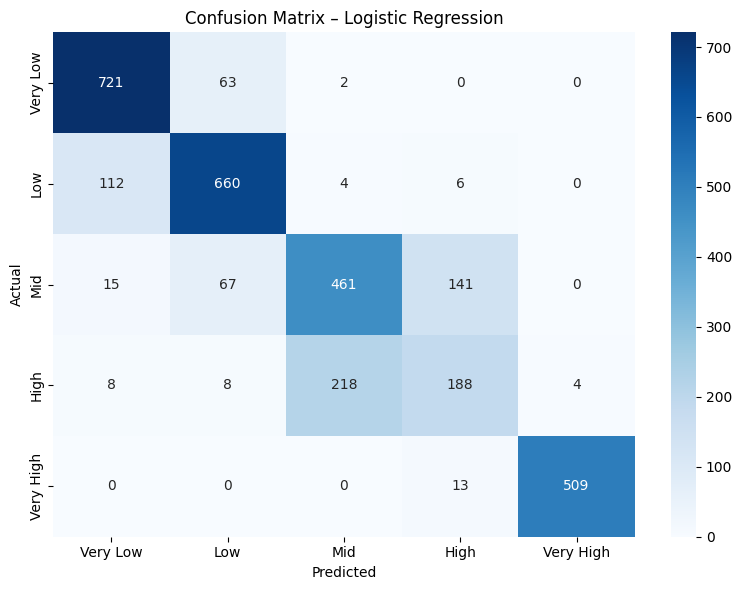

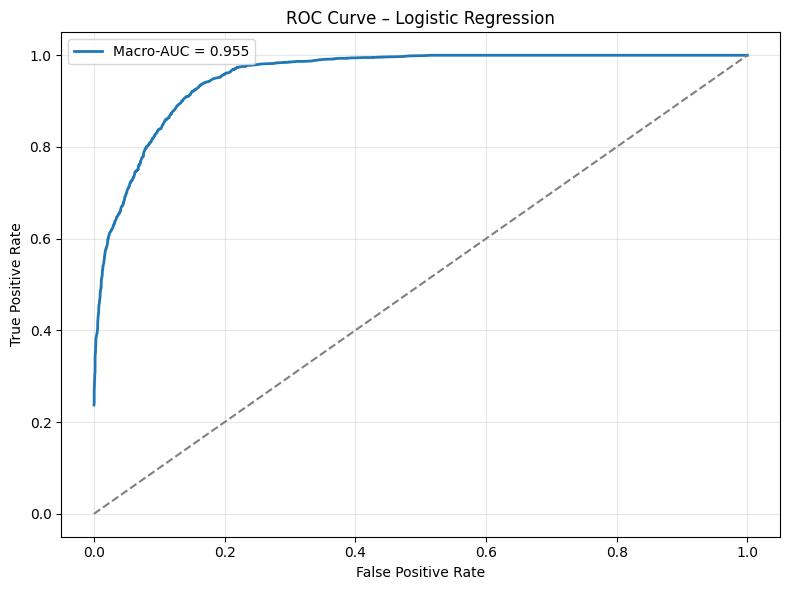

In [ ]:
print("📊 Logistic Regression")
lr_model = trained_lr_models[0.8]
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)

plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
lr_auc = plot_roc_curve(y_test, y_prob_lr, "Logistic Regression")

Neural Network

📊 Neural Network


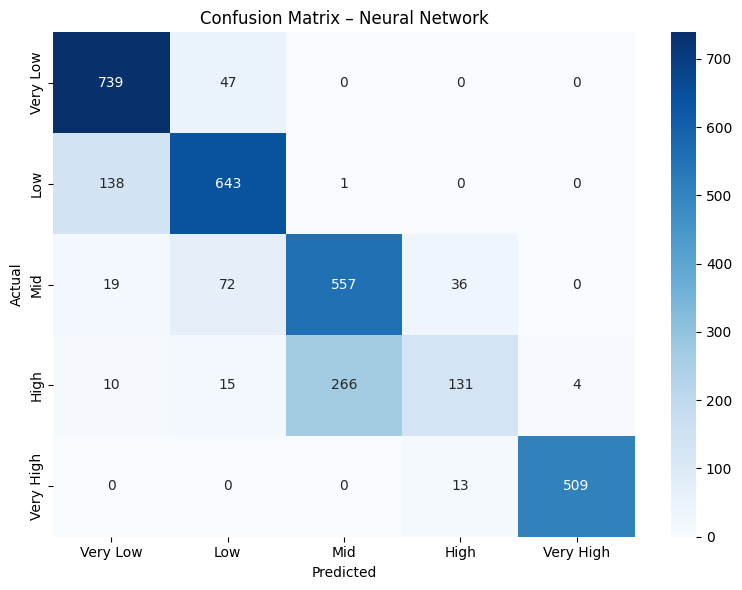

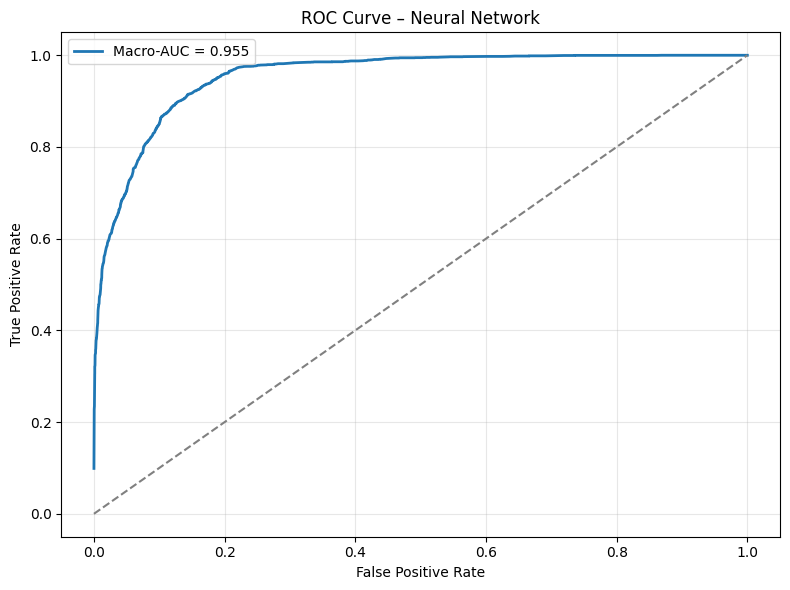

In [ ]:
print("📊 Neural Network")
nn_model = trained_nn_models[0.8]
X_test_dense = X_test.toarray()
y_pred_nn = nn_model.predict(X_test_dense)
y_prob_nn = nn_model.predict_proba(X_test_dense)

plot_confusion_matrix(y_test, y_pred_nn, "Neural Network")
nn_auc = plot_roc_curve(y_test, y_prob_nn, "Neural Network")


RNN

In [ ]:
# Recreate the 80% split for RNN
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_text = reviews_df['cleaned_review'].fillna("").astype(str)
y_labels = reviews_df['rating_category']

X_train_text, X_test_text, y_train_rnn, y_test_rnn = train_test_split(
    X_text, y_labels,
    train_size=0.8,
    random_state=42,
    stratify=y_labels
)

# Tokenize with same parameters as training
tokenizer_rnn = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer_rnn.fit_on_texts(X_train_text)
X_test_seq = pad_sequences(tokenizer_rnn.texts_to_sequences(X_test_text), maxlen=100)


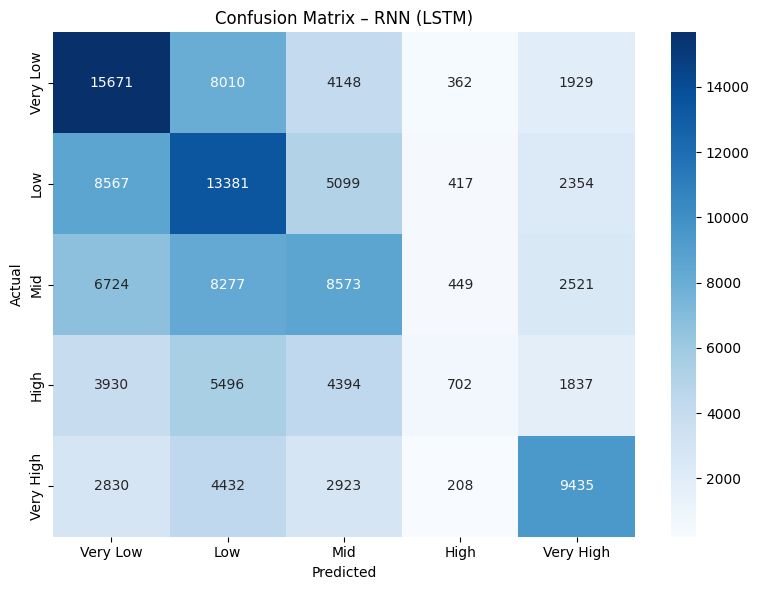

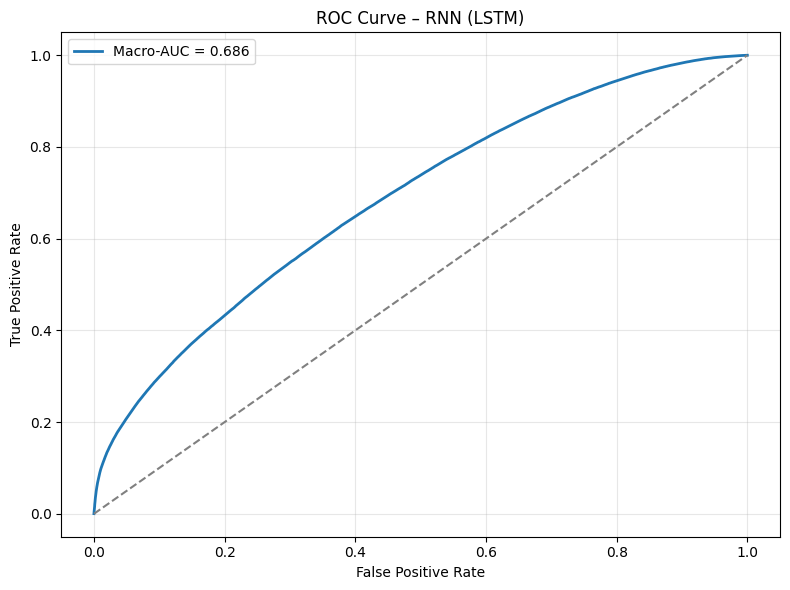

In [ ]:
rnn_model = rnn_models[0.8]
y_prob_rnn = rnn_model.predict(X_test_seq, verbose=0)
y_pred_rnn = np.argmax(y_prob_rnn, axis=1)

plot_confusion_matrix(y_test_rnn, y_pred_rnn, "RNN (LSTM)")
rnn_auc = plot_roc_curve(y_test_rnn, y_prob_rnn, "RNN (LSTM)")


BASELINE

📊 Baseline


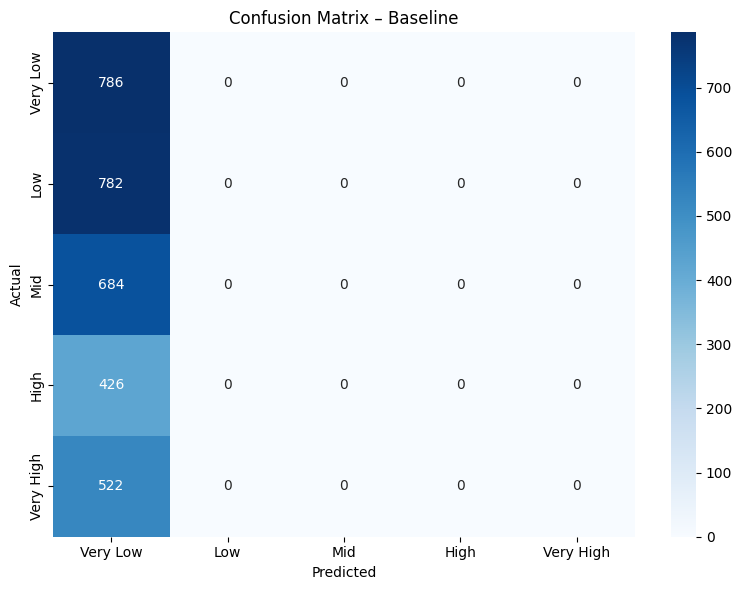

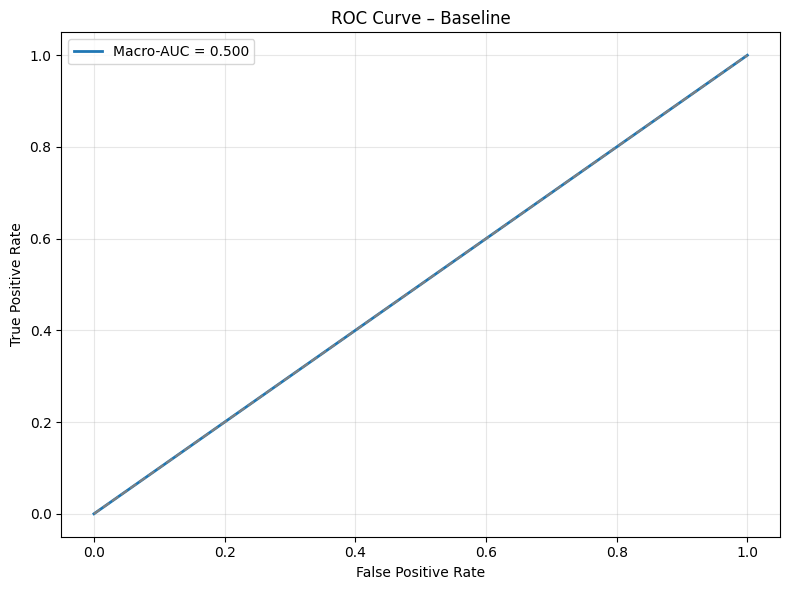

In [ ]:
print("📊 Baseline")
from sklearn.dummy import DummyClassifier

baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)
y_prob_base = baseline_model.predict_proba(X_test)

plot_confusion_matrix(y_test, y_pred_base, "Baseline")
baseline_auc = plot_roc_curve(y_test, y_prob_base, "Baseline")


SUMMARY

In [ ]:
print("\n" + "="*70)
print("📈 MACRO-AUC SCORES")
print("="*70)
print(f"Logistic Regression:  {lr_auc:.4f}")
print(f"Neural Network:       {nn_auc:.4f}")
print(f"RNN (LSTM):           {rnn_auc:.4f}")
print(f"Baseline:             {baseline_auc:.4f}")
print("="*70)






📈 MACRO-AUC SCORES
Logistic Regression:  0.9552
Neural Network:       0.9545
RNN (LSTM):           0.6864
Baseline:             0.5000


# testing Logistic Regression

## Saving the Logistic Regression Models

In [ ]:
import joblib

print("\nSaving Logistic Regression Models...")

for split, model in trained_lr_models.items():
    filename = f"lr_model_split_{int(split*100)}.pkl"
    joblib.dump(model, filename)
    print(f"✔ Saved: {filename}")



Saving Logistic Regression Models...
✔ Saved: lr_model_split_40.pkl
✔ Saved: lr_model_split_60.pkl
✔ Saved: lr_model_split_80.pkl


## Preparing 5 Test Examples with Ground Truth Labels

In [ ]:
# Use 80% split for sample testing
best_split = 0.8
X_train, X_test, y_train, y_test = combined_datasets[best_split]

sample_X = X_test[:5]
sample_y = y_test[:5]

print("\nPrepared 5 test samples:")
print(sample_y)



Prepared 5 test samples:
[1 0 3 2 0]


## loading Each Model and Predicting on the 5 Examples

In [ ]:
print("\n\n📌 TESTING ALL LOGISTIC REGRESSION MODELS")
print("-"*70)

for split in trained_lr_models.keys():
    filename = f"lr_model_split_{int(split*100)}.pkl"
    model = joblib.load(filename)

    preds = model.predict(sample_X)

    print(f"\n🔹 Results for Logistic Regression Model ({int(split*100)}% split):")
    print("-"*50)

    for i in range(5):
        print(f"Example {i+1}: Predicted = {preds[i]} | Truth = {sample_y[i]}")




📌 TESTING ALL LOGISTIC REGRESSION MODELS
----------------------------------------------------------------------

🔹 Results for Logistic Regression Model (40% split):
--------------------------------------------------
Example 1: Predicted = 1 | Truth = 1
Example 2: Predicted = 0 | Truth = 0
Example 3: Predicted = 3 | Truth = 3
Example 4: Predicted = 0 | Truth = 2
Example 5: Predicted = 0 | Truth = 0

🔹 Results for Logistic Regression Model (60% split):
--------------------------------------------------
Example 1: Predicted = 1 | Truth = 1
Example 2: Predicted = 0 | Truth = 0
Example 3: Predicted = 3 | Truth = 3
Example 4: Predicted = 0 | Truth = 2
Example 5: Predicted = 0 | Truth = 0

🔹 Results for Logistic Regression Model (80% split):
--------------------------------------------------
Example 1: Predicted = 1 | Truth = 1
Example 2: Predicted = 0 | Truth = 0
Example 3: Predicted = 3 | Truth = 3
Example 4: Predicted = 0 | Truth = 2
Example 5: Predicted = 0 | Truth = 0
